<a href="https://colab.research.google.com/github/juridicodiniz/devai/blob/main/Atividade_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic - Kaggle
Desenvolver um modelo completo para o dataset da competição Titanic do Kaggle: [Titanic - Machine Learning from Disaster | Kaggle](https://www.kaggle.com/competitions/titanic/)

Fazer pelo menos uma submissão e colocar um print screen das submissões no Jupyter Notebook  do Colab.

In [1]:
#Fazer upload do arquivo titanic.zip e depois descompacta-lo

from google.colab import files
files.upload()

Saving titanic.zip to titanic.zip


{'titanic.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00&\x12\x8bOA\xaa\xebr\xff\xff\xff\xff\xff\xff\xff\xff\x15\x00\x14\x00gender_submission.csv\x01\x00\x10\x00\xba\x0c\x00\x00\x00\x00\x00\x00h\x03\x00\x00\x00\x00\x00\x00-\x961\x8e\x1d7\x10Ds\x03\xbe\xc9\x06S\xd5$\xbby\x04g\x02t\x02\x01Z\x08J\x1cH\xb0\xce\xef\xbf[/*p\xf6\xe3\xa1\x9a3O\xad/\xdf~\xff~\xff\xf7\xc7\xfb\xaf\x7f\xbe\xbf}\xfd\xef\xd7\x9f\x9f\x7f\xde\xbf\xff\xfd\xd7\\\xbf=\x1fQo\xfa\x88\x95\xd3N\x9c<\xec\x9c&\xa7\xfbq\xba\xcf\xf3q\xba\x8frr\xa2\x12+\x7f\xdb9\x9d\x9c:1y\x18\x8aB\x91\x12\xa1(\x14\x85\xa2P\x14\x8a:\xa7\xc9)\x14?\x89tq(\x0e\xc5\xa1x\'N\x1e\x86\xe2P|?\xa3B\xa9P*\x94\n\xa5V"\x94J\x97\n\xa52Q\xa5\xcb\xcaD+\x13\xadPV(+]V(+]V(+\x94\x15\xcaN\x97\x1d\xca\x0ee\x87\xb2\xd3e\x87\xb2C\xd9\xb9\xdd\x9d\x89v(\'\x94\x13\xcaq"\x94\x93.\'\xb7{2\xd1I\x97\x93.\'\xf7\xd2\xa1t(\x9d.\x1dJ\xa7K\x87\xd2\xe9\xd2\xa1t\xbat(\x93{\x99\xdc\xee\xa4\xcb\x842\xe92\xa1L(\x13\xca\x842\x99\xe8\x86rC\xb9\xa1\xdcP\xf2\xed\xde|\xbb7\xdf\xee\xcd\xb7{o&\xca\x

In [2]:
#Descompacta os CSV baixados do site
!unzip titanic.zip


Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
#Carrega o CSV de traino
import pandas as pd
data = pd.read_csv("train.csv")
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#Define qual caracteristica será sainda, que será predita
y = data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [5]:
#Elimina a caracteristica de saida das de entrada
X = data.drop('Survived',axis=1)
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
for column in X.columns:
  print(f"{column:>12} {len(set(X[column])):4} {X[column].dtypes}")

 PassengerId  891 int64
      Pclass    3 int64
        Name  891 object
         Sex    2 object
         Age  265 float64
       SibSp    7 int64
       Parch    7 int64
      Ticket  681 object
        Fare  248 float64
       Cabin  148 object
    Embarked    4 object


In [7]:
#Elimina as carateristicas que não relevantes para a predição
indesejadas = ['PassengerId', 'Name', 'Ticket', 'Cabin']
Xdrop = X.drop(indesejadas, axis=1)
Xdrop.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [8]:
#Separa as caracteristicas numericas
Xnum = Xdrop.select_dtypes('number')
Xnum.columns
Xnum

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [9]:
#Verifica quais informações, por caracteristicas, são nulas
for column in Xnum.columns:
  print(f"{column:>12} {sum(Xnum[column].isnull())}")

      Pclass 0
         Age 177
       SibSp 0
       Parch 0
        Fare 0


In [10]:
#Trataremos os valores nulos, vamos trocar o valor nulo pela mediana, por exemplo
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

#vai trocar os valores nulos no Xnum, onde temos os valores que são numericos
XnumLimpo = imputer.fit_transform(Xnum)
XnumLimpo

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [11]:
#Trateamento para as caracteristicas categoricas, que não são numericas
Xcat = Xdrop.select_dtypes('object')
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [12]:
#Verificando os valores nulos
for column in Xcat.columns:
  print(f"{column:>12} {sum(Xcat[column].isnull())}")

         Sex 0
    Embarked 2


In [13]:
#Trataremos os valores nulos dos valores Categoricos, vamos trocar pelo mais frequente
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")

#vai trocar os valores nulos no Xcat pelo valor mais frequente
XcatLimpo = imputer.fit_transform(Xcat)
XcatLimpo

array([['male', 'S'],
       ['female', 'C'],
       ['female', 'S'],
       ...,
       ['female', 'S'],
       ['male', 'C'],
       ['male', 'Q']], dtype=object)

In [14]:
#Varios algortmos de IA não aceitam valores categóricos, só numericos,então teremos de fazer uma conversão, um tratamento
#NO nosso caso, a melhor maneira é cria colunas para os valores das caracteristicas e na linha teria 1 ou 0 para essa caracteristica
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
XcatHot = encoder.fit_transform(XcatLimpo)
XcatHot


<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [15]:
#Mostrar como array a inclusão de colunas e com 0 ou 1 nos resultados
#2 primeiras colunas para (female e male) e as 3 ultimas (C,Q e S)
XcatHot.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [16]:
#Juntando as caracteriticas numericas e categoriacas no mesmo array tratado
import numpy as np
#concatena
Xtratado = np.c_[XnumLimpo, XcatHot.toarray()]
Xtratado.shape

(891, 10)

In [17]:
Xtratado

array([[ 3., 22.,  1., ...,  0.,  0.,  1.],
       [ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [18]:
#Carrega o CSV de treino e Teste
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#Verificar as colunas do treino que tb estão no Teste
train.columns.isin(test.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [19]:
#Verificar qual é a 2ª coluna, que tem no treino e não tem no teste
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
#Vimos a cima que é a coluna "Survived", vamos mandar exibir, a coluna true, negando o comando
train.columns[~train.columns.isin(test.columns)]

Index(['Survived'], dtype='object')

In [21]:
#COM COMEÇAR A FAZER O PIPELINE , SEQUENCIA DE COMANDOS PARA PREDIZER
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosDesejados(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasIndesejadas_ = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    return self
  def transform(self, X, y=None):
    return X.drop(self.colunasIndesejadas_, axis=1)

atributosDesejados = AtributosDesejados()
Xdrop = atributosDesejados.fit_transform(X)
Xdrop.columns


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosNumericos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasNumericas = X.select_dtypes(include ='number').columns
    return self
  def transform(self, X, y=None):
    return X[self.colunasNumericas]

atributosNumericos = AtributosNumericos()
Xnum = atributosNumericos.fit_transform(Xdrop)
Xnum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [23]:
# Tratar os valores nulos dos dados numéricos

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipenum = Pipeline([
    ('atributos_numericos',  AtributosNumericos()),
    ('imputer',  SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

XnumLimpo = pipenum.fit_transform(Xdrop)
XnumLimpo

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

In [24]:
#********************** CARACTERISTICAS CATEGÓRICAS *************************
from sklearn.base import BaseEstimator, TransformerMixin


class AtributosCategoricos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasCategoricas = X.select_dtypes('object').columns
    return self
  def transform(self, X, y=None):
    return X[self.colunasCategoricas]

atributosCategoricos = AtributosCategoricos()
Xcat = atributosCategoricos.fit_transform(Xdrop)
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [25]:
#tratar os valores nulos categoricos

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Coluna Embarked pode ser S, Q ou C

pipecat = Pipeline([
    ('atributos_categoricos',  AtributosCategoricos()),
    ('imputer',  SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder())
])


XcatLimpo = pipecat.fit_transform(Xdrop)
XcatLimpo.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [26]:
#Unir os dos dataset: Numerico e categorico

from sklearn.pipeline import FeatureUnion

unecaracteristicas = FeatureUnion({
    ('pipenum', pipenum),
    ('pipecat', pipecat)
})

#Xdrop é o dataset com as colunas que nos interessa, mas em natura, a função "unecaracteriscas" vai utilizar varias funções para o paramero passado "Xdrop"
Xtratado = unecaracteristicas.fit_transform(Xdrop)
Xtratado.toarray()

array([[ 0.        ,  1.        ,  0.        , ...,  0.43279337,
        -0.47367361, -0.50244517],
       [ 1.        ,  0.        ,  1.        , ...,  0.43279337,
        -0.47367361,  0.78684529],
       [ 1.        ,  0.        ,  0.        , ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.43279337,
         2.00893337, -0.17626324],
       [ 0.        ,  1.        ,  1.        , ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [ 0.        ,  1.        ,  0.        , ..., -0.4745452 ,
        -0.47367361, -0.49237783]])

In [27]:
# FAZENDO UM PIPELINE QUE VAI FAZER TODO O TRATAMENTO DE UMA VEZ, USANDO OUTROS PIPELINES

from sklearn.pipeline import Pipeline

preproc = Pipeline([
    ('atributos_desejados', AtributosDesejados()),
    ('unecaracteristicas', unecaracteristicas)
])

Xtratado = preproc.fit_transform(X)
Xtratado.toarray()

array([[ 0.        ,  1.        ,  0.        , ...,  0.43279337,
        -0.47367361, -0.50244517],
       [ 1.        ,  0.        ,  1.        , ...,  0.43279337,
        -0.47367361,  0.78684529],
       [ 1.        ,  0.        ,  0.        , ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.43279337,
         2.00893337, -0.17626324],
       [ 0.        ,  1.        ,  1.        , ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [ 0.        ,  1.        ,  0.        , ..., -0.4745452 ,
        -0.47367361, -0.49237783]])

In [28]:
#FAZER UM PIPELINE TOTAL, USANDO UM CLASSIFICADOR SIMPLES, UMA ARVORES DE DECISÃO

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pipetotal = Pipeline([
    ('preproc', preproc),
    ('arvore', DecisionTreeClassifier())
])

pipetotal.fit(X,y)
ypred = pipetotal.predict(X)
accuracy_score(y, ypred)

0.9797979797979798

In [29]:
import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.02504873, 0.01890182, 0.01972294, 0.019382  , 0.01909375]),
  'score_time': array([0.00776267, 0.00845623, 0.01019645, 0.0078578 , 0.00846148]),
  'test_score': array([0.75977654, 0.78651685, 0.78651685, 0.73595506, 0.82022472])},
 0.7777980038917833)

In [30]:
#
#  *******************************  FAZER A PREDIÇÃO COM OS DADOS TRATATOS *****************************
#
# Algoritmos de classificação são usados para resolver problemas de classificação
#
#FAZER UM PIPELINE TOTAL, USANDO UM CLASSIFICADOR SIMPLES, UMA ARVORES DE DECISÃO

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# Criando o pipeline com pré-processamento e classificador MLP
pipetotal_new = Pipeline([
    ('preproc', preproc),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=42))
])



# Treinando o modelo usando o pipeline
pipetotal_new.fit(X,y)


# Fazendo previsões no conjunto de teste
ypred = pipetotal_new.predict(X)

# Avaliando a precisão do modelo
accuracy = accuracy_score(y, ypred)
print(f'Acurácia: {accuracy}')


Acurácia: 0.8597081930415263


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
#Usando cros validade para verificar a validação cruzada

import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(pipetotal_new, X, y)
scores, np.mean(scores['test_score'])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

({'fit_time': array([4.47908974, 5.14200711, 3.35093498, 3.33004189, 5.86256361]),
  'score_time': array([0.0250082 , 0.0117569 , 0.01116228, 0.01268506, 0.01772261]),
  'test_score': array([0.76536313, 0.80337079, 0.84831461, 0.79213483, 0.85955056])},
 0.8137467830016949)

In [32]:
#preparar um resultado para mandar para submissão no kaggle, pode madnar 8 por dia
# site  https://www.kaggle.com/competitions/titanic/

#calculando um ypred para submeter
pipetotal_new.fit(X,y)
ypred = pipetotal_new.predict(test)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = ypred
submission.to_csv('MLP_submission.csv',index=False)

#PAREI EM 1:36:01 VIDEO https://www.youtube.com/watch?v=s9AIKQLbpt8&ab_channel=TutoriaisdePrograma%C3%A7%C3%A3o

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
#vamos calcular os parametro sem ser pelos dados, pela tecnica do hiperparamentros utilizando bibliotecas do Sklearn
# vamos usar o  GridSearchCV que termina os hiperparamentros por validação cruzada
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import cross_validate

parametros = {
    'arvore__max_depth': [None] + list(range(1,10,2))
}


# modelo será o novo pipetotal com os paramentros ajustados
#  Esse ajuste faz vairos testes e treino, sendo que muito demorado para bases grandes
modelo = GridSearchCV(pipetotal, param_grid=parametros)


#calculando um ypred para submeter
modelo.fit(X,y)
ypred = modelo.predict(test)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = ypred
submission.to_csv('tree_gscv_submission.csv',index=False)


#fazendo o teste de validação cruzada com o modelo ajustado
scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.78051829, 0.78833342, 0.7908597 , 0.775455  , 0.79792976]),
  'score_time': array([0.00709486, 0.00707936, 0.0073657 , 0.00719333, 0.00794506]),
  'test_score': array([0.81564246, 0.81460674, 0.81460674, 0.78089888, 0.85393258])},
 0.8159374803841567)

In [34]:
#vamos calcular os parametro sem ser pelos dados, pela tecnica do hiperparamentros utilizando bibliotecas do Sklearn
# vamos usar o  GridSearchCV que termina os hiperparamentros por validação cruzada
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import cross_validate

parametros = {
    'classifier__hidden_layer_sizes': [None] + list(range(1,100,10))
}


# modelo será o novo pipetotal com os paramentros ajustados
#  Esse ajuste faz vairos testes e treino, sendo que muito demorado para bases grandes
modelo_new = GridSearchCV(pipetotal_new, param_grid=parametros)


#calculando um ypred para submeter
modelo_new.fit(X,y)
ypred = modelo_new.predict(test)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = ypred
submission.to_csv('mlp_gscv_submission.csv',index=False)


#fazendo o teste de validação cruzada com o modelo ajustado
scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

({'fit_time': array([0.78104472, 0.78061342, 0.78409743, 0.83259153, 0.80066538]),
  'score_time': array([0.00718832, 0.00740027, 0.0077908 , 0.00900388, 0.00746274]),
  'test_score': array([0.81564246, 0.81460674, 0.81460674, 0.78089888, 0.85393258])},
 0.8159374803841567)

In [40]:
#Mostrando no modelo o que ele escolheu como melhor estimador,
# max_depth é a lista de  parametros que foi indicado para o GridSearchCV usar,
# no fluxograma abaixo mostra qual foi o valor de max_depth que foi escolhido

modelo_new.fit(X,y)
modelo_new.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('atributos_desejados', AtributosDesejados()),
                                 ('unecaracteristicas',
                                  FeatureUnion(transformer_list=[('pipecat',
                                                                  Pipeline(steps=[('atributos_categoricos',
                                                                                   AtributosCategoricos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('encoder',
                                                                                   OneHotEncoder())])),
                                                                 ('pipenum',
                                                                  Pipeline(steps=[('atributos_numericos',
                                                                                   AtributosNumericos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='median')),
                                                                                  ('scaler',
                                                                                   StandardScaler())]))]))])),
                ('scaler', StandardScaler(with_mean=False)),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=21, max_iter=500,
                               random_state=42))])

In [38]:
# Atividade trocar o classificador e submetido no site.



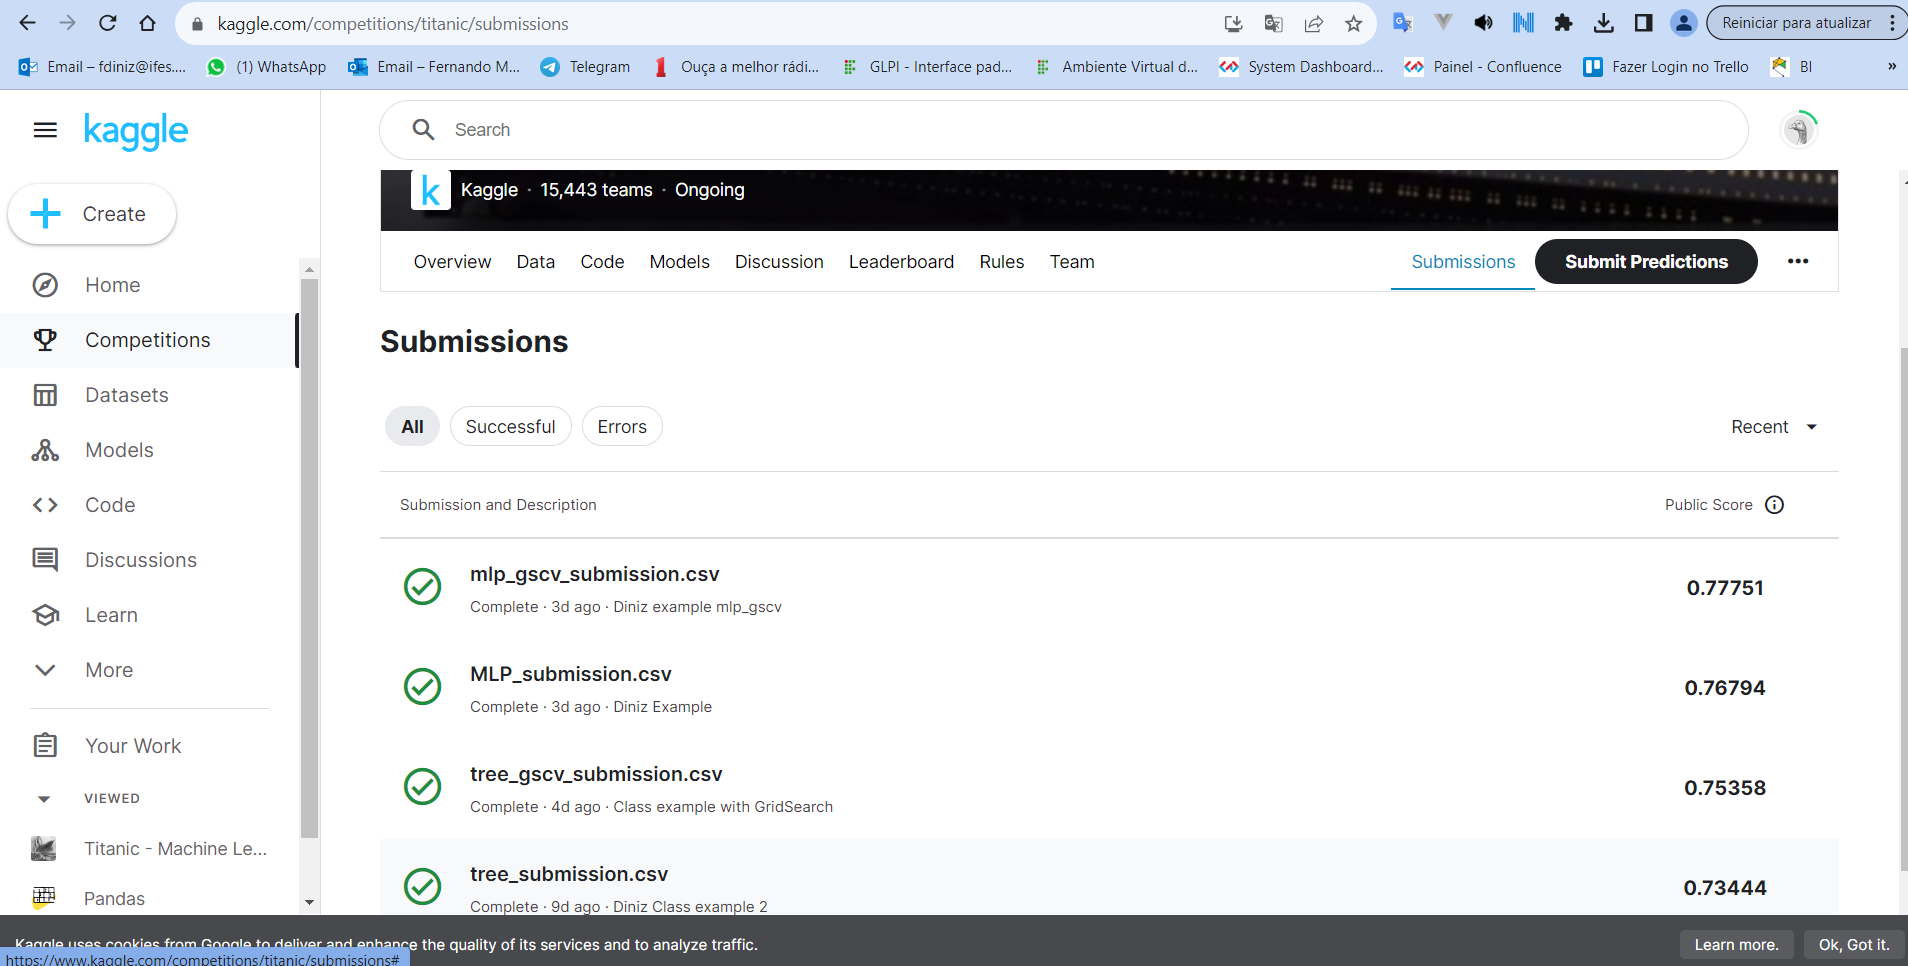